In [2]:
!pip install split-folders

In [3]:
import splitfolders

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
flower_data = ImageDataGenerator(rescale=1./255)


In [10]:
splitfolders.ratio('/content/drive/MyDrive/DEEP_LEARNING _DATASETS/flowers', output="output", seed=1337, ratio=(.7, 0.2,0.1)) 



Copying files: 0 files [00:00, ? files/s]
Copying files: 1 files [00:00,  7.62 files/s]
Copying files: 2 files [00:00,  5.13 files/s]
Copying files: 3 files [00:00,  3.63 files/s]
Copying files: 4 files [00:01,  3.60 files/s]
Copying files: 5 files [00:01,  3.11 files/s]
Copying files: 6 files [00:01,  3.15 files/s]
Copying files: 7 files [00:02,  3.43 files/s]
Copying files: 8 files [00:02,  3.61 files/s]
Copying files: 9 files [00:02,  3.63 files/s]
Copying files: 10 files [00:02,  3.74 files/s]
Copying files: 11 files [00:03,  3.54 files/s]
Copying files: 12 files [00:03,  3.27 files/s]
Copying files: 13 files [00:04,  3.03 files/s]
Copying files: 14 files [00:04,  2.97 files/s]
Copying files: 15 files [00:04,  3.26 files/s]
Copying files: 16 files [00:04,  3.21 files/s]
Copying files: 17 files [00:05,  3.25 files/s]
Copying files: 18 files [00:05,  3.08 files/s]
Copying files: 19 files [00:05,  2.87 files/s]
Copying files: 20 files [00:06,  2.95 files/s]
Copying files: 21 files [0

In [11]:
import tensorflow

In [35]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))

In [36]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
train_generator = train_datagen.flow_from_directory(
'/content/output/train',
target_size=(150, 150),batch_size=32,class_mode='categorical')

Found 3022 images belonging to 5 classes.


In [39]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/output/val',
      target_size=(150,150),batch_size=32,class_mode="categorical")

Found 862 images belonging to 5 classes.


In [40]:
test_generator = test_datagen.flow_from_directory(
'/content/output/test',target_size=(150, 150),
batch_size=32,class_mode='categorical')

Found 439 images belonging to 5 classes.


In [41]:
history = model.fit_generator(
train_generator,
steps_per_epoch=95,
epochs=20,
validation_data=validation_generator,
validation_steps=27)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
95/95 [==============================] - 11s 112ms/step - loss: 1.3448 - acc: 0.4193 - val_loss: 1.1746 - val_acc: 0.5151
Epoch 2/20
95/95 [==============================] - 11s 117ms/step - loss: 1.0998 - acc: 0.5443 - val_loss: 1.1102 - val_acc: 0.5476
Epoch 3/20
95/95 [==============================] - 11s 118ms/step - loss: 1.0078 - acc: 0.6052 - val_loss: 1.0597 - val_acc: 0.5824
Epoch 4/20
95/95 [==============================] - 11s 112ms/step - loss: 0.9367 - acc: 0.6320 - val_loss: 0.9868 - val_acc: 0.6230
Epoch 5/20
95/95 [==============================] - 11s 118ms/step - loss: 0.8652 - acc: 0.6734 - val_loss: 1.0460 - val_acc: 0.5963
Epoch 6/20
95/95 [==============================] - 11s 118ms/step - loss: 0.7929 - acc: 0.6962 - val_loss: 1.0069 - val_acc: 0.6206
Epoch 7/20
95/95 [==============================] - 11s 114ms/step - loss: 0.7292 - acc: 0.7250 - val_loss: 0.9242 - val_acc: 0.6485
Epoch 8/20
95/95 [==============================] - 11s 111ms/step - 

In [45]:
model.save('flower_classification.h5')

In [43]:
model.evaluate(test_generator)

14/14 [==============================] - 1s 79ms/step - loss: 1.0293 - acc: 0.6811


[1.0293046236038208, 0.6810933947563171]

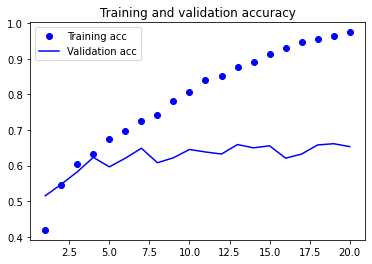

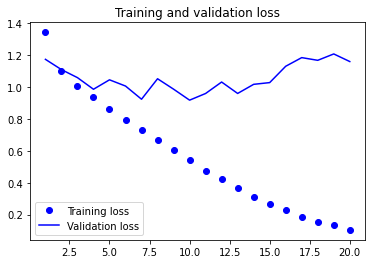

In [44]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
img = image.load_img("/content/drive/MyDrive/FLOWER PREPROCESSED/test/dandelion/578938011_34918b1468.jpg", target_size=(150, 150))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [ ]:
prediction

array([[0.08543869, 0.7409856 , 0.14204478, 0.00109416, 0.03043679]],
      dtype=float32)

In [ ]:
img = image.load_img("/content/drive/MyDrive/FLOWER PREPROCESSED/test/sunflower/2598973480_07de93e91d_n.jpg", target_size=(150, 150))
x=image.img_to_array(img) / 255
resized_img_np = np.expand_dims(x,axis=0)
prediction = model.predict(resized_img_np)

In [ ]:
prediction

array([[0.01803514, 0.02815951, 0.02405916, 0.88281983, 0.04692634]],
      dtype=float32)